In [1]:
# notebook to investigate basic characteristics of May 9 riftquake

In [2]:
import numpy as np
import obspy
import matplotlib.pyplot as plt

In [3]:
# set path and data parameters
path = "/media/Data/Data/PIG/"
stat = "PIG2"
chans = "HH*"

# set day of interest
year = "2012"
month = "05"
day = "09"

# read in traces without instrument response removed
files = path + "MSEED/raw/" + stat + "/" + chans + "/*" + chans + "__" + year + month + day + "T000000Z__" + "*"
st = obspy.read(files)

In [4]:
# basic preprocessing
st.detrend("demean")
st.detrend("linear")
st.taper(max_percentage=0.00025, max_length=20.)

# copy stream
st_low = st.copy()

In [5]:
# set path to XML response file
pathXML = path + "XML/" + chans + "/*" + stat + ".xml"
inv = obspy.read_inventory(pathXML)

# set frequency bands for IR removal
freq = [1/2000,1/1000,45,50]
freq_low = [1/20000,1/10000,45,50]

In [6]:
# remove instrumental response to velocity
st.remove_response(inventory=inv,pre_filt=freq,output="VEL")
st_low.remove_response(inventory=inv,pre_filt=freq_low,output="VEL")

3 Trace(s) in Stream:
XC.PIG2..HHE | 2012-05-09T00:00:00.000000Z - 2012-05-10T00:00:00.000000Z | 100.0 Hz, 8640001 samples
XC.PIG2..HHN | 2012-05-09T00:00:00.000000Z - 2012-05-10T00:00:00.000000Z | 100.0 Hz, 8640001 samples
XC.PIG2..HHZ | 2012-05-09T00:00:00.000000Z - 2012-05-10T00:00:00.000000Z | 100.0 Hz, 8640001 samples

In [7]:
# make copies for convenience
st_copy = st.copy()
st_low_copy = st_low.copy()

In [8]:
# reset traces
st = st_copy
st_low = st_low_copy

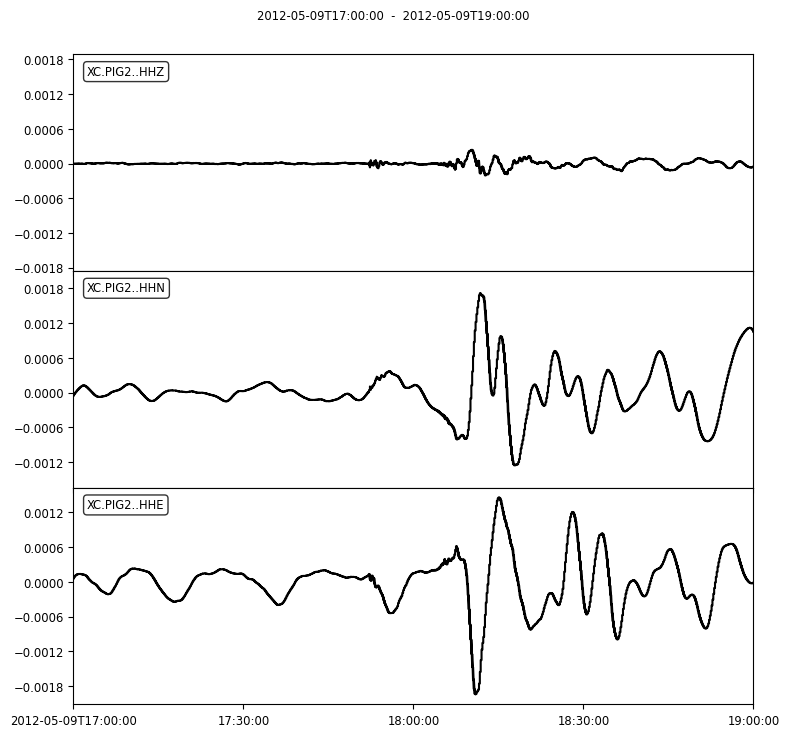

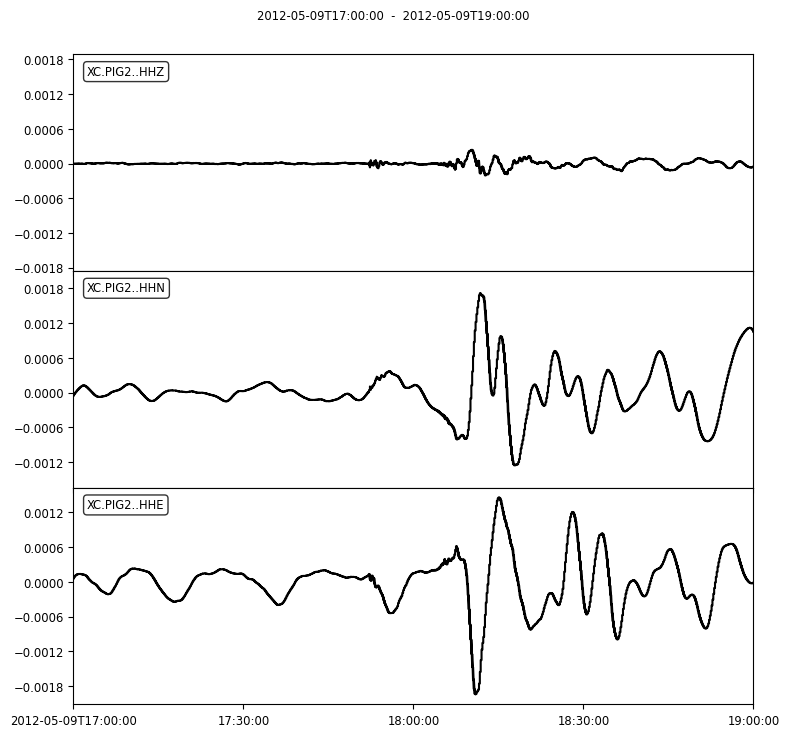

In [11]:
# make higher frequency plot
st_copy.filter("highpass", freq=1/100)
st.plot(starttime = obspy.UTCDateTime(2012,5,9,17),endtime = obspy.UTCDateTime(2012,5,9,19))

In [9]:
# rotate velocity seismogram to calculated backazimuth for May 9 riftquake and report max amplitudes
st.rotate(method="NE->RT", back_azimuth=250)
st_low.rotate(method="NE->RT", back_azimuth=250) 
print("Maximum " + st[0].stats.channel + " velocity " + str(freq) + ": " + str(max(abs(st[0].data))) + " m/s")
print("Maximum " + st[1].stats.channel + " velocity " + str(freq) + ": " + str(max(abs(st[1].data))) + " m/s")
print("Maximum " + st[2].stats.channel + " velocity " + str(freq) + ": " + str(max(abs(st[2].data))) + " m/s")
print("Maximum " + st_low[0].stats.channel + " velocity " + str(freq) + ": " + str(max(abs(st_low[0].data))) + " m/s")
print("Maximum " + st_low[1].stats.channel + " velocity " + str(freq) + ": " + str(max(abs(st_low[1].data))) + " m/s")
print("Maximum " + st_low[2].stats.channel + " velocity " + str(freq) + ": " + str(max(abs(st_low[2].data))) + " m/s")

Maximum HHT velocity [0.0005, 0.001, 45, 50]: 0.00218398092965 m/s
Maximum HHR velocity [0.0005, 0.001, 45, 50]: 0.0016836549043 m/s
Maximum HHZ velocity [0.0005, 0.001, 45, 50]: 0.000237681458004 m/s
Maximum HHT velocity [0.0005, 0.001, 45, 50]: 0.0143163047796 m/s
Maximum HHR velocity [0.0005, 0.001, 45, 50]: 0.0162456738578 m/s
Maximum HHZ velocity [0.0005, 0.001, 45, 50]: 0.000247368819403 m/s


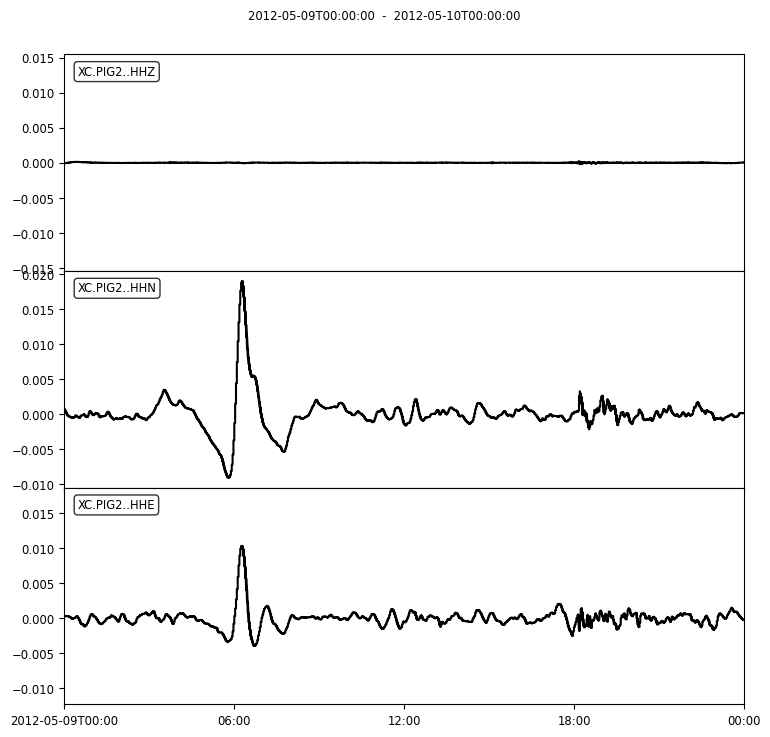

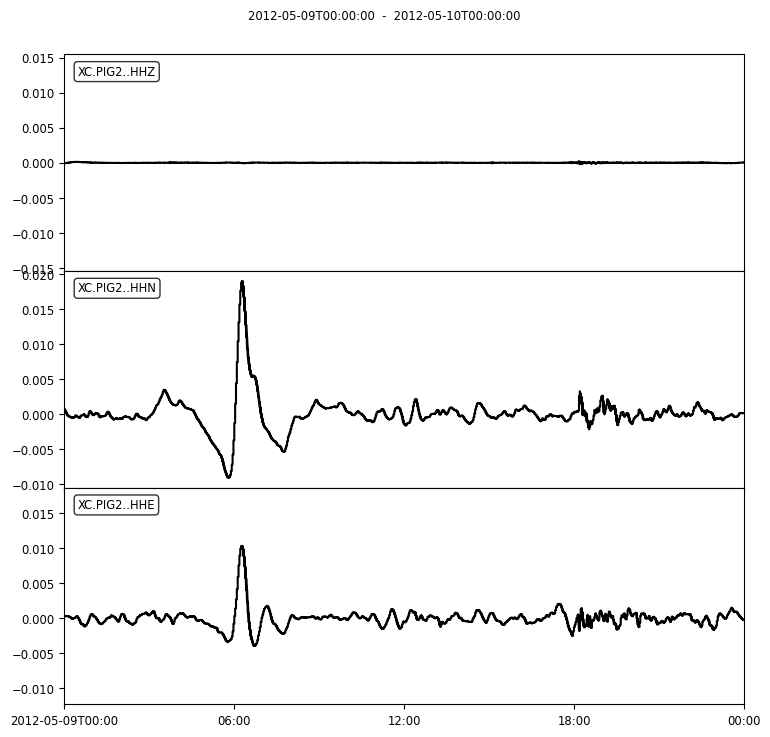

In [13]:
st_low.plot(equal_scaling=False)

In [ ]:
# make basic plots of entire day
st.plot(equal_scale=False);
st_low.plot(equal_scale=False);

# make basic plots of 17:00 onward
st.plot(starttime=st[0].stats.starttime+17*60*60,equal_scale=False);
st_low.plot(starttime=st[0].stats.starttime+17*60*60,equal_scale=False);

In [ ]:
# # get sample values corresponding to 18:00 and 20:00
start_sample = int(st[2].stats.sampling_rate*60*60*18)
end_sample = int(st[2].stats.sampling_rate*60*60*20)+1

# make plot of spectra
fig, ax = plt.subplots(len(st),figsize=(10,10))
for i in range(len(st)):
    spectra = abs(np.fft.rfft(st[i].data[start_sample:end_sample]))
    f = np.fft.fftfreq(end_sample-start_sample, d=1/st[i].stats.sampling_rate)
    power = np.square(spectra)
    psd = power/(f[1]-f[0])
    ax[i].plot(f[:len(f)//2+1],psd)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Frequency [Hz]')
    ax[i].set_ylabel('PSD [$(m/s)^2$/Hz]')
    ax[i].title.set_text(st_low[i].stats.channel)
    
    # report dominant period
    print("Dominant " + st[i].stats.channel + " period " + str(freq) + ": " + str(round(1/f[np.argmax(psd)])) + " s")
    
plt.suptitle("PSD for each component " + str(freq))
plt.tight_layout() 
plt.show()

In [12]:
# report dominant periods
print("Dominant " + st[1].stats.channel + " period " + str(freq) + ": " + str(max(abs(st[1].data))) + " m/s")
print("Dominant " + st[2].stats.channel + " period " + str(freq) + ": " + str(max(abs(st[2].data))) + " m/s")

Dominant HHR period [0.0005, 0.001, 45, 50]: 0.0016836549043 m/s
Dominant HHZ period [0.0005, 0.001, 45, 50]: 0.000237681458004 m/s


In [ ]:
# make plot of lower-frequency spectra
fig, ax = plt.subplots(len(st_low),figsize=(10,10))
for i in range(len(st_low)):
    spectra = abs(np.fft.rfft(st_low[i].data[start_sample:end_sample]))
    f = np.fft.fftfreq(end_sample-start_sample, d=1/st_low[i].stats.sampling_rate)
    power = np.square(spectra)
    psd = power/(f[1]-f[0])
    ax[i].plot(f[:len(f)//2+1],psd)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Frequency [Hz]')
    ax[i].set_ylabel('PSD [$(m/s)^2$/Hz]')
    ax[i].title.set_text(st_low[i].stats.channel)
    
    # report dominant period
    print("Dominant " + st_low[i].stats.channel + " period " + str(freq) + ": " + str(round(1/f[np.argmax(psd)])) + " s")
    
plt.suptitle("PSD for each component " + str(freq_low))
plt.tight_layout() 
plt.show()